# Neural Net and Predictive Power Score

# Importing libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense,Activation
import ppscore as pps

# Setting seed

In [109]:
np.random.seed(7)

# Loading dataset

In [110]:
df=pd.read_csv(r'C:\Users\13433\Downloads\BostonHousing.csv',usecols=np.arange(0,13,1))

In [127]:
df

,CRIM,CHAS,NOX,RM,AGE,DIS,LSTAT,MEDV
0,0.00632,0,0.538,6.575,65.2,4.0900,4.98,24.0
1,0.02731,0,0.469,6.421,78.9,4.9671,9.14,21.6
2,0.02729,0,0.469,7.185,61.1,4.9671,4.03,34.7
3,0.03237,0,0.458,6.998,45.8,6.0622,2.94,33.4
4,0.06905,0,0.458,7.147,54.2,6.0622,5.33,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0,0.573,6.593,69.1,2.4786,9.67,22.4
502,0.04527,0,0.573,6.120,76.7,2.2875,9.08,20.6
503,0.06076,0,0.573,6.976,91.0,2.1675,5.64,23.9
504,0.10959,0,0.573,6.794,89.3,2.3889,6.48,22.0


# Checking null values

In [128]:
df.isnull().sum()

CRIM     0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
LSTAT    0
MEDV     0
dtype: int64

# Overview

In [129]:
df.describe()

,CRIM,CHAS,NOX,RM,AGE,DIS,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.069170,0.554695,6.284634,68.574901,3.795043,12.653063,22.532806
std,8.601545,0.253994,0.115878,0.702617,28.148861,2.105710,7.141062,9.197104
min,0.006320,0.000000,0.385000,3.561000,2.900000,1.129600,1.730000,5.000000
25%,0.082045,0.000000,0.449000,5.885500,45.025000,2.100175,6.950000,17.025000
50%,0.256510,0.000000,0.538000,6.208500,77.500000,3.207450,11.360000,21.200000
75%,3.677082,0.000000,0.624000,6.623500,94.075000,5.188425,16.955000,25.000000
max,88.976200,1.000000,0.871000,8.780000,100.000000,12.126500,37.970000,50.000000


# Heatmap

Here Heatmap is based on pearson correlation which only gives me information about linear correlation.
In real life that's not the case most of the times. So we will take a look at something different known as Predictive Power score(PPS).
More about PPS can be found here- https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598. I highly recommend to go through this.

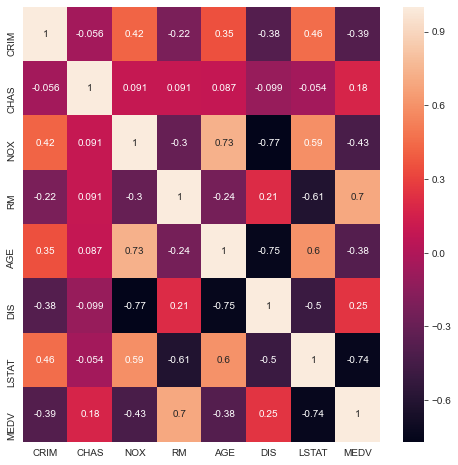

In [131]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

# Pairplots

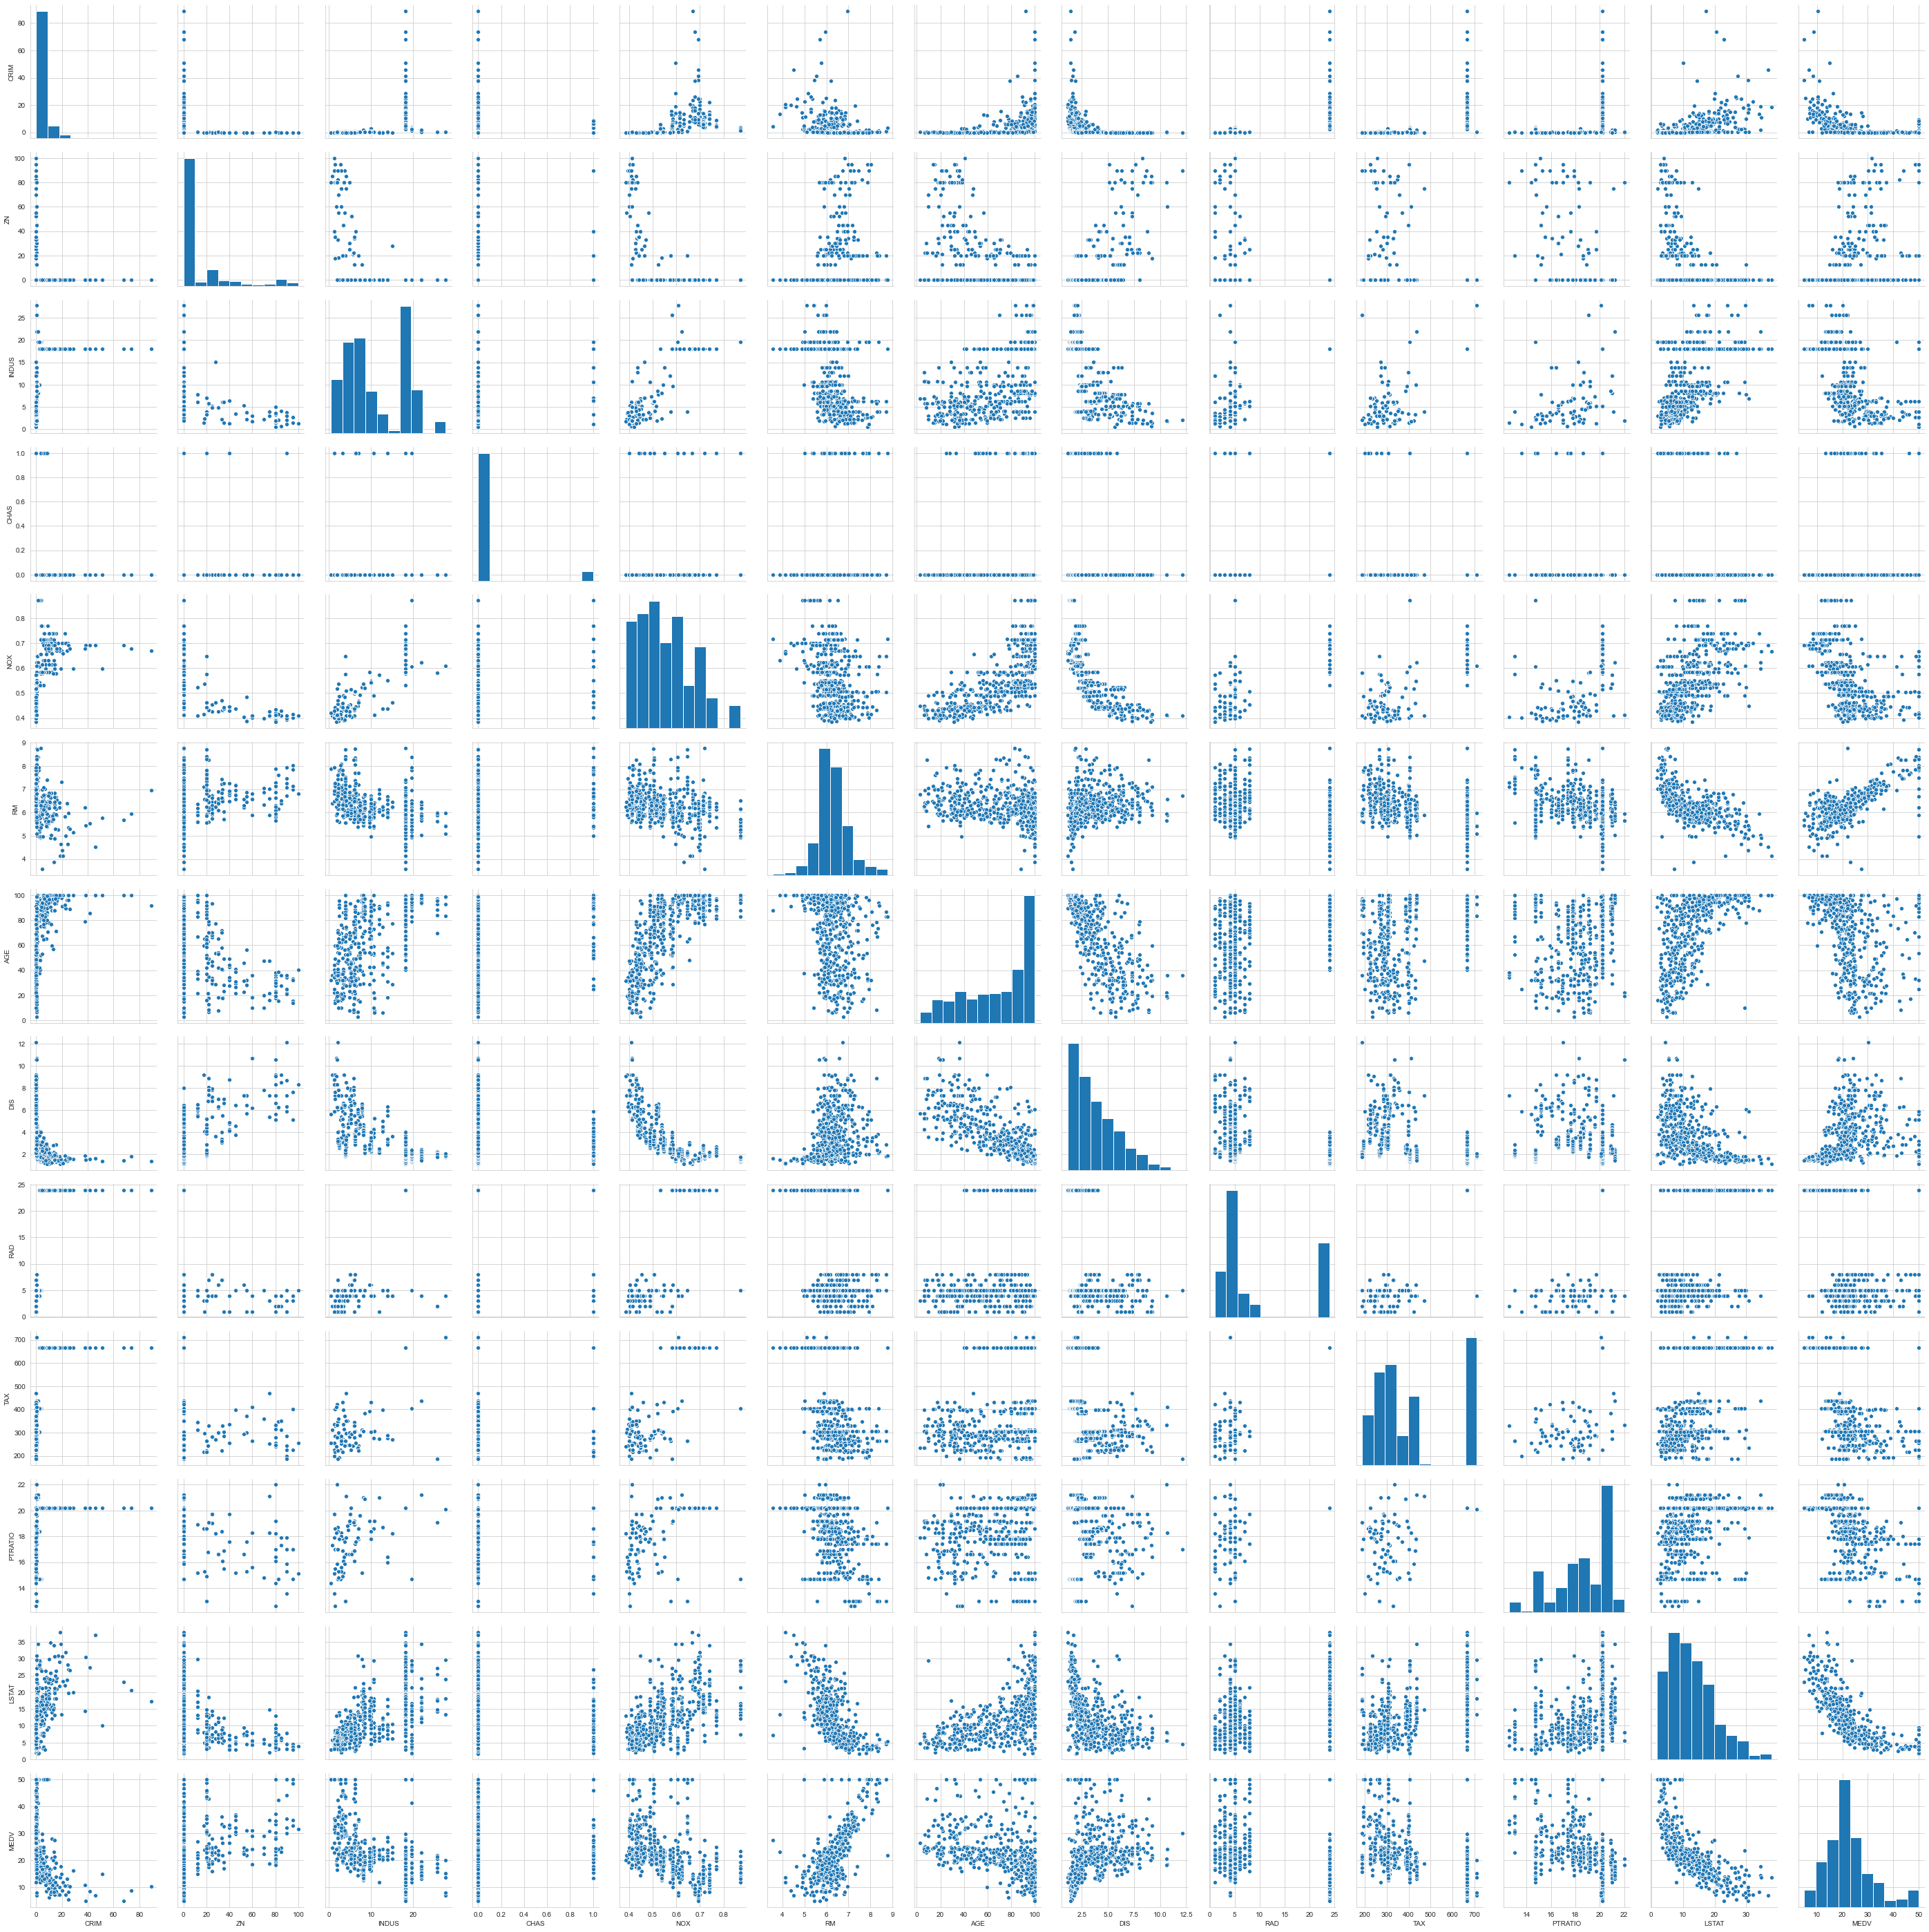

In [115]:
# this gives you an idea about the relation between two columns.
sns.set_style("whitegrid");
sns.pairplot(df,height=3);
plt.show()

Correlation is same between A to B and B to A, which is not true in many real life scenarios. So what should we do? Predictive Power Score(PPS) is here to rescue you. We can use PPS to find the predictive power of one variable on other.
PPS lies between [0,1] unlike correlation.

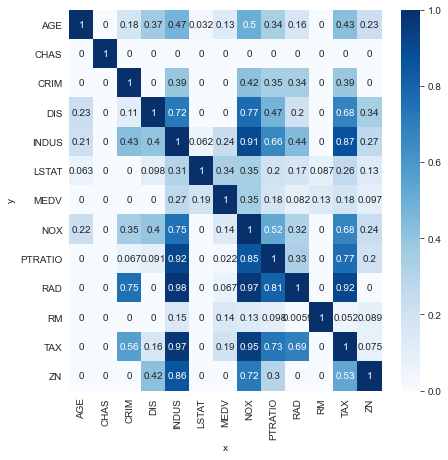

In [117]:
# Plotting ppscore of our dataset. Here these values represent the pps of x on y and the opposite is not true since it is not
# symmetrical.
pps_df=pps.matrix(df)[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')
plt.figure(figsize=(7,7))
sns.heatmap(pps_df,vmin=0,vmax=1,cmap='Blues',annot=True)

In [118]:
# dropping the columns which can be predicted by other columns.
df.drop(columns=['PTRATIO','RAD','ZN','TAX','INDUS'],axis=1,inplace=True)

In [119]:
df

,CRIM,CHAS,NOX,RM,AGE,DIS,LSTAT,MEDV
0,0.00632,0,0.538,6.575,65.2,4.0900,4.98,24.0
1,0.02731,0,0.469,6.421,78.9,4.9671,9.14,21.6
2,0.02729,0,0.469,7.185,61.1,4.9671,4.03,34.7
3,0.03237,0,0.458,6.998,45.8,6.0622,2.94,33.4
4,0.06905,0,0.458,7.147,54.2,6.0622,5.33,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0,0.573,6.593,69.1,2.4786,9.67,22.4
502,0.04527,0,0.573,6.120,76.7,2.2875,9.08,20.6
503,0.06076,0,0.573,6.976,91.0,2.1675,5.64,23.9
504,0.10959,0,0.573,6.794,89.3,2.3889,6.48,22.0


In [120]:
X=df.iloc[:,:7]
X=np.array(X)

In [121]:
Y=df.iloc[:,7:]

In [122]:
Y=np.array(Y)

# Splitting data into Train and Test sets

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

# Standardizing Data

In [124]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Forming neural network architecture

In [125]:
model=Sequential()
model.add(Dense(300,input_dim=7,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
model.fit(x=X_train,y=Y_train,validation_split=0.1,epochs=50,batch_size=10,shuffle=True,verbose=1)


Epoch 1/50
41/41 [==============================] - 0s 3ms/step - loss: 455.9679 - mae: 18.9300 - val_loss: 155.9580 - val_mae: 10.3895
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 73.8590 - mae: 6.6756 - val_loss: 30.7467 - val_mae: 4.3122
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 29.2368 - mae: 3.8645 - val_loss: 14.9953 - val_mae: 3.0055
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 24.6428 - mae: 3.5194 - val_loss: 17.7325 - val_mae: 3.4667
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 22.8416 - mae: 3.4195 - val_loss: 15.0414 - val_mae: 3.1316
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 21.0717 - mae: 3.2122 - val_loss: 13.4544 - val_mae: 2.9275
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 21.2334 - mae: 3.2260 - val_loss: 13.0891 - val_mae: 2.7853
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 

# Evaluating Model performance

In [126]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 1ms/step - loss: 7.0118 - mae: 2.0461


[7.011813163757324, 2.046142816543579]

Mean absolute error is 2.04 for our model